1. Chuẩn hóa dữ liệu: scale dữ liệu, format kích thước dữ liệu

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

multi_df = pd.read_csv("data2.csv")
X = multi_df.iloc[:, :-1].values  # (m, n)
y = multi_df.iloc[:, -1].values   # (m,)

X = X.T         # (n, m)
y = y[None, :]  # (1, m)

mu = np.mean(X, axis=1, keepdims=True)
sigma = np.std(X, axis=1, keepdims=True)
X_norm = (X - mu) / sigma

m = X.shape[1]
X_b = np.vstack([np.ones((1, m)), X_norm])  # (n+1, m)

2. Viết chương trình cho phép học các tham số của mô hình hồi quy tuyến tính đa biến

In [23]:
def compute_cost(X, y, theta):
    h = theta.T @ X
    loss = h - y
    return (1 / (2 * m)) * np.sum(loss ** 2)

alpha = 0.01
num_iters = 400
theta = np.zeros((X_b.shape[0], 1))
J_history = []

for _ in range(num_iters):
    h = theta.T @ X_b
    loss = h - y
    gradient = (1 / m) * (X_b @ loss.T)
    theta -= alpha * gradient
    J_history.append(compute_cost(X_b, y, theta))

3. Tính J ở mỗi vòng lặp, và vẽ biểu đồ J ở các giá trị learning rate khác nhau sau khi chạy hết các vòng lặp.

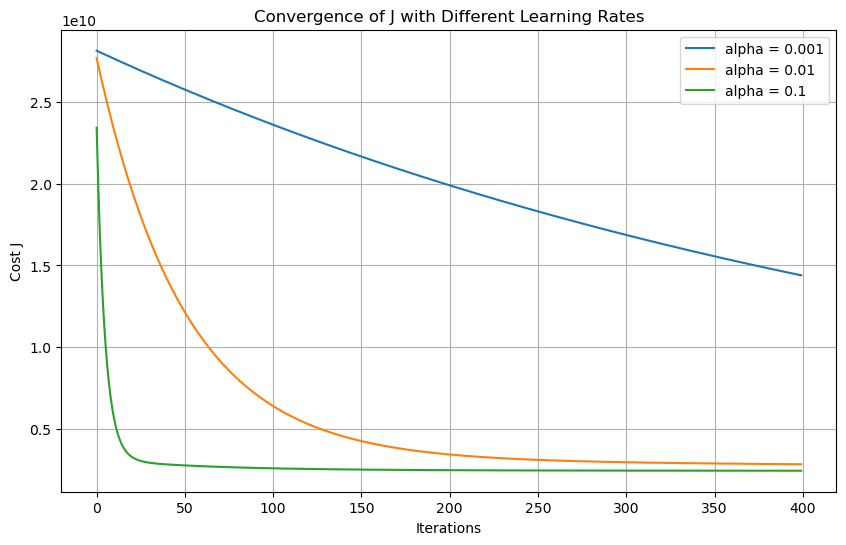

In [24]:
alphas = [0.001, 0.01, 0.1]
J_histories = {}

for alpha in alphas:
    theta_temp = np.zeros((X_b.shape[0], 1))
    J_temp = []
    for _ in range(num_iters):
        h = theta_temp.T @ X_b
        loss = h - y
        gradient = (1 / m) * (X_b @ loss.T)
        theta_temp -= alpha * gradient
        J_temp.append(compute_cost(X_b, y, theta_temp))
    J_histories[alpha] = J_temp

plt.figure(figsize=(10, 6))
for alpha, J_hist in J_histories.items():
    plt.plot(range(num_iters), J_hist, label=f"alpha = {alpha}")
plt.xlabel("Iterations")
plt.ylabel("Cost J")
plt.title("Convergence of J with Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()

4. Kiểm chứng các theta mà các bạn tìm được bằng phương pháp gradient descent với phương pháp normal equation.

In [25]:
X_unscaled = multi_df.iloc[:, :-1].values  # (m, n)
X_b_unscaled = np.hstack([np.ones((X_unscaled.shape[0], 1)), X_unscaled])  # (m, n+1)
y_unscaled = multi_df.iloc[:, -1].values[:, None]  # (m, 1)

theta_normal = np.linalg.pinv(X_b_unscaled.T @ X_b_unscaled) @ X_b_unscaled.T @ y_unscaled

print("Theta from gradient descent:")
print(theta.ravel())
print("\nTheta from normal equation:")
print(theta_normal.ravel())

Theta from gradient descent:
[203579.74628178 -22786.95555438 -27838.65379965  21936.46956196
   4310.17990054  10863.65388085 -18426.36941119  12079.04413648
  77945.65203613]

Theta from normal equation:
[-3.62060087e+06 -4.31396370e+04 -4.29256729e+04  1.15069494e+03
 -8.37825126e+00  1.17648543e+02 -3.84887721e+01  4.54360031e+01
  4.05070684e+04]
